# **Práctica 3: Brillo y contraste**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

# Histograma

Para analizar el brillo y el contraste de una imagen es importante entender el histograma de intensidades. Para ello se va a comenzar la práctica realizando una función para visualizar una imagen junto a su histograma.


> Implementa una función que dada una imagen realice una visualización conjunta tanto de la imagen como de su histograma y distribución acumulada siguiendo las indicaciones que se muestran a continuación:
>
> Se debe verificar que la imagen es de tipo uint8. El histograma tendrá 256 bins, desde 0 a 255
>
> La función debe permitir el uso de imágenes en color o de imágenes en escala de grises
>
> Para calcular el histograma se debe implementar una función propia
>

A continuación se muestra algo de ayuda.



In [9]:
# Importar bibliotecas que pueden ser necesarias
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage
import seaborn as sns
 

ModuleNotFoundError: No module named 'seaborn'

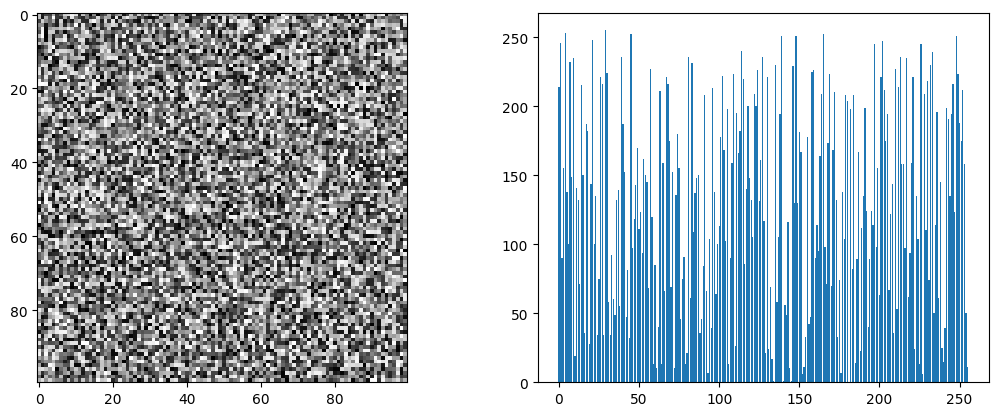

In [10]:
# Creación de la figura
width, height = plt.rcParams['figure.figsize']
fig, (ax_img, ax_hist) = plt.subplots(1, 2, figsize=(2*width, height))

# La primera se usará para la imagen, la segunda para el histograma

# Ejemplo de visualización de la imagen
img = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)
ax_img.imshow(img, cmap='gray')

# Ejemplo de visualización del histograma
hist = np.random.randint(0, 256, size=(256,), dtype=np.uint8)
ax_hist.bar(np.arange(256), hist)
plt.show()

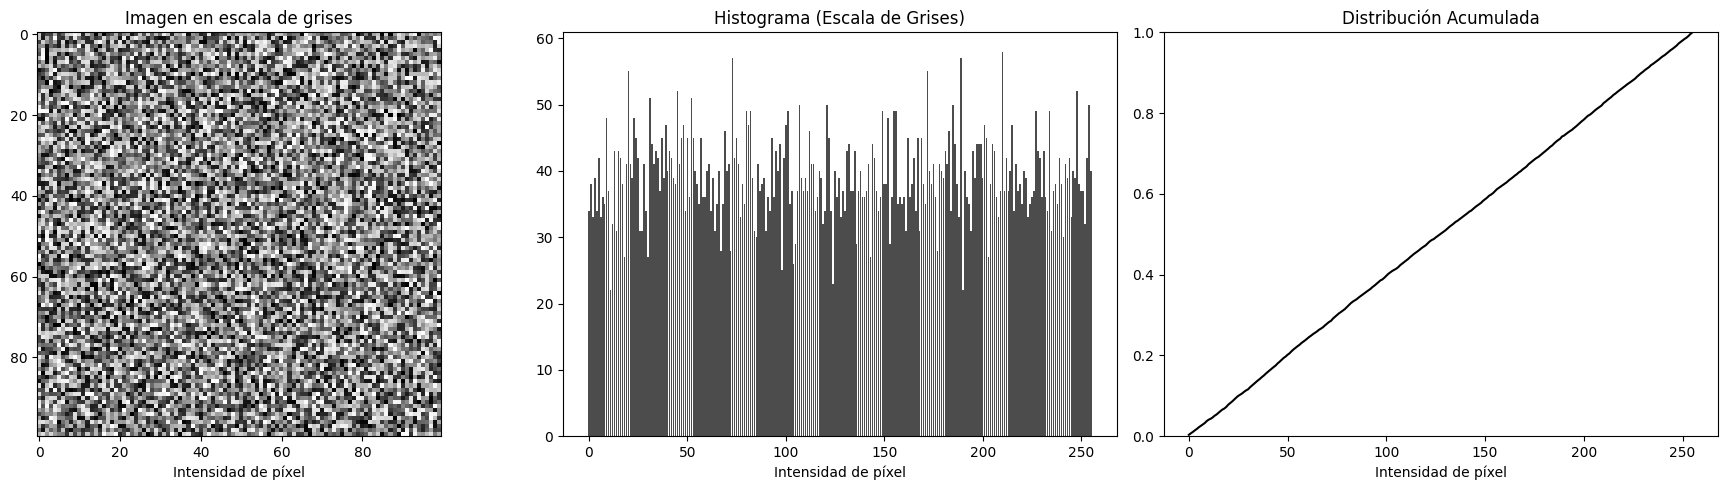

In [13]:
def iter_channels(color_image):
    """Itera sobre los canales de una imagen en color."""
    for channel in np.rollaxis(color_image, -1):
        yield channel

def compute_histogram(image, bins=256):
    """Calcula el histograma manualmente para una imagen de tipo uint8."""
    histogram = np.zeros(bins, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

def plot_histogram(img):
    """Visualiza la imagen, su histograma y la distribución acumulativa."""
    if img.dtype != np.uint8:
        raise ValueError("La imagen debe ser de tipo uint8")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Mostrar la imagen original
    if img.ndim == 2:
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Imagen en escala de grises")
        
        # Calcular histograma
        hist = compute_histogram(img)
        cdf = hist.cumsum() / hist.sum()  # Distribución acumulada
        
        axes[1].bar(range(256), hist, color='black', alpha=0.7)
        axes[1].set_title("Histograma (Escala de Grises)")
        
        axes[2].plot(cdf, color='black')
        axes[2].set_title("Distribución Acumulada")
        axes[2].set_ylim(0, 1)
    
    elif img.ndim == 3:
        axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB
        axes[0].set_title("Imagen en color")
        
        colors = 'rgb'  # Colores de los canales
        
        for channel, color in zip(iter_channels(img), colors):
            hist = compute_histogram(channel)
            cdf = hist.cumsum() / hist.sum()
            
            axes[1].plot(hist, color=color)
            axes[2].plot(cdf, color=color)
        
        axes[1].set_title("Histograma por canal (RGB)")
        axes[2].set_title("Distribución Acumulada por canal (RGB)")
        axes[2].set_ylim(0, 1)
    
    for ax in axes:
        ax.set_xlabel("Intensidad de píxel")
    
    plt.tight_layout()
    plt.show()

plot_histogram(img)


## Ajuste de contraste lineal

Una vez que se tiene la visualización del histograma se puede analizar mejor el brillo y el contraste. También es más fácil entender cómo funcionan los métodos de ajuste de contraste.

> Crea una función que realice un ajuste de intensidad afín usando la ecuación $s = ra+b$, donde $s$ es el valor del píxel de salida, $r$ el de entrada y $a$ y $b$ son dos constantes. La función debe evitar que el resultado se salga del rango de representación (`np.clip`). Para ello se recomienda realizar una conversión a flotante para realizar las operaciones (`img.astype(np.double)`). Después de la operación se debe volver a convertir a su formato original.

> Prueba con diversos valores de $a$ y $b$ y analiza el resultado.


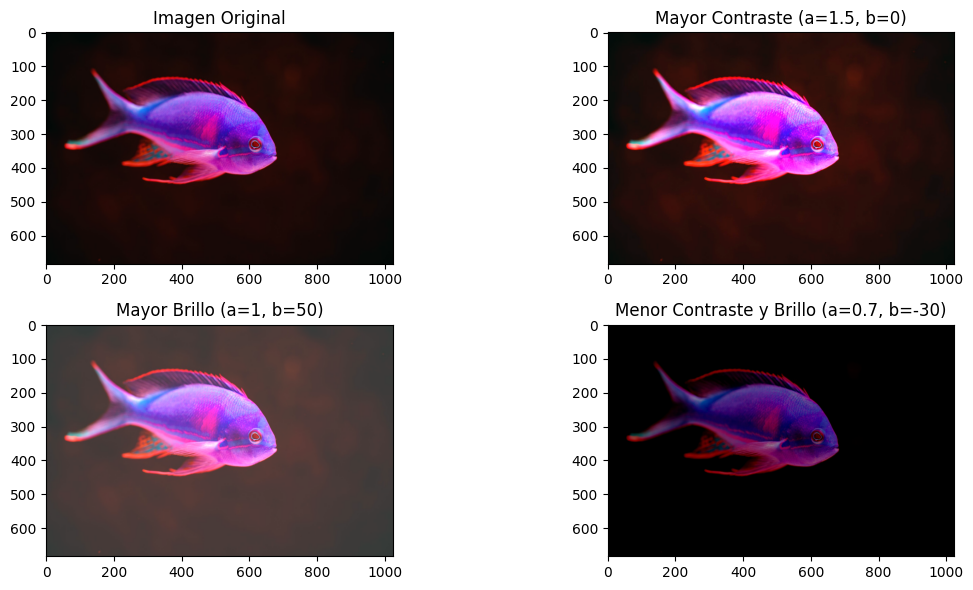

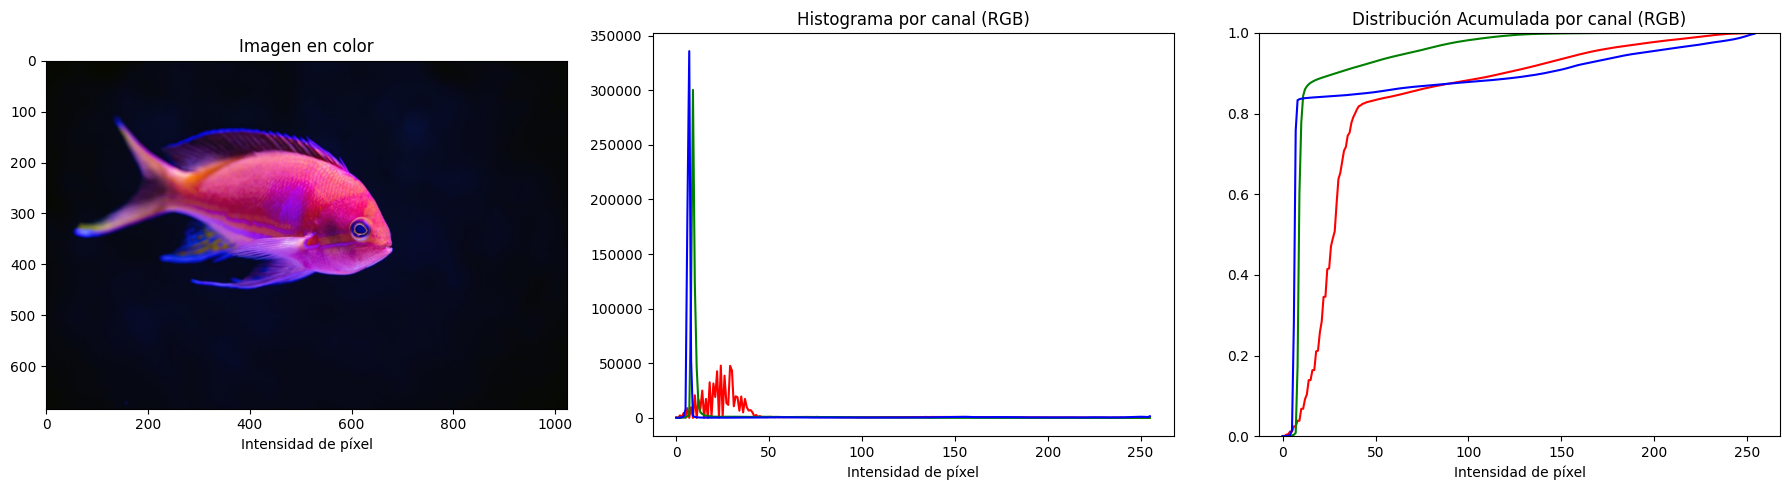

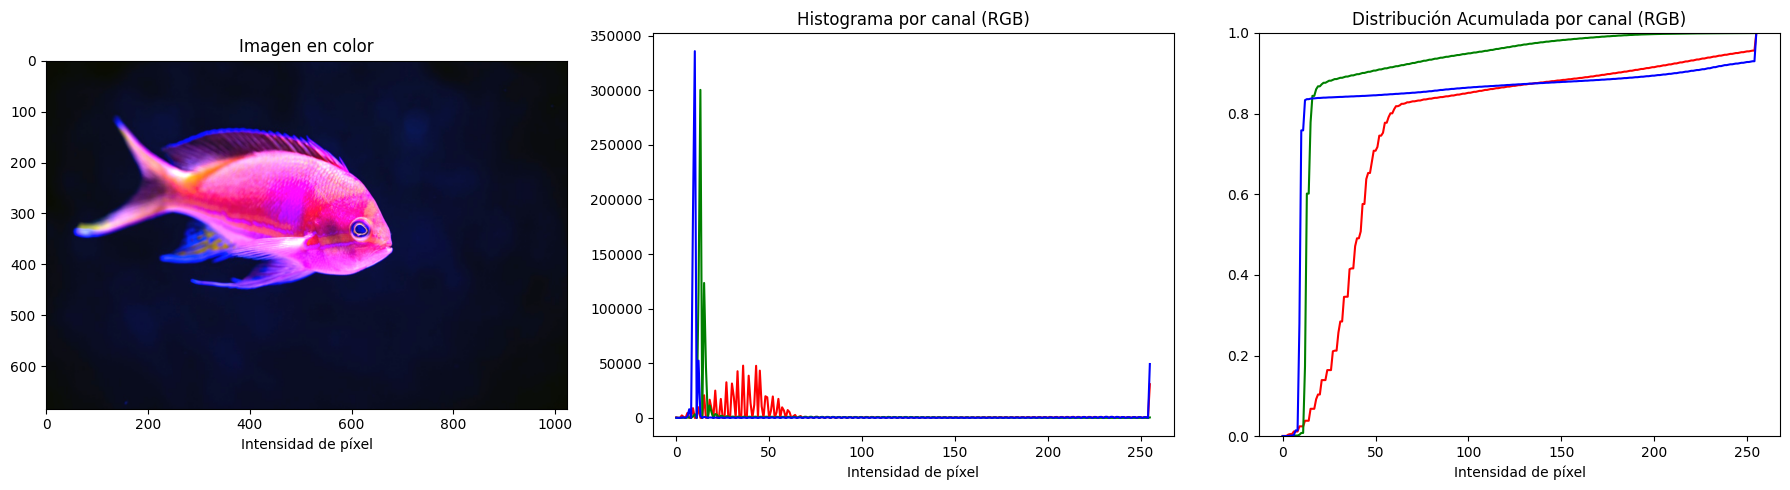

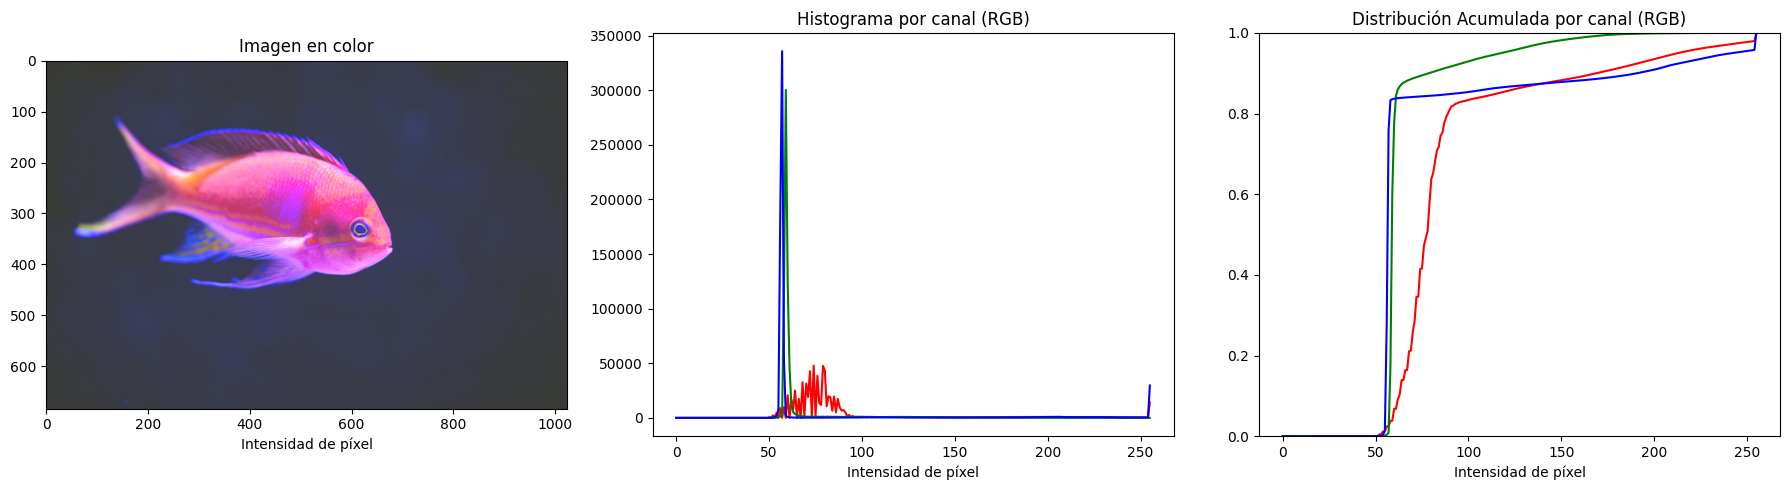

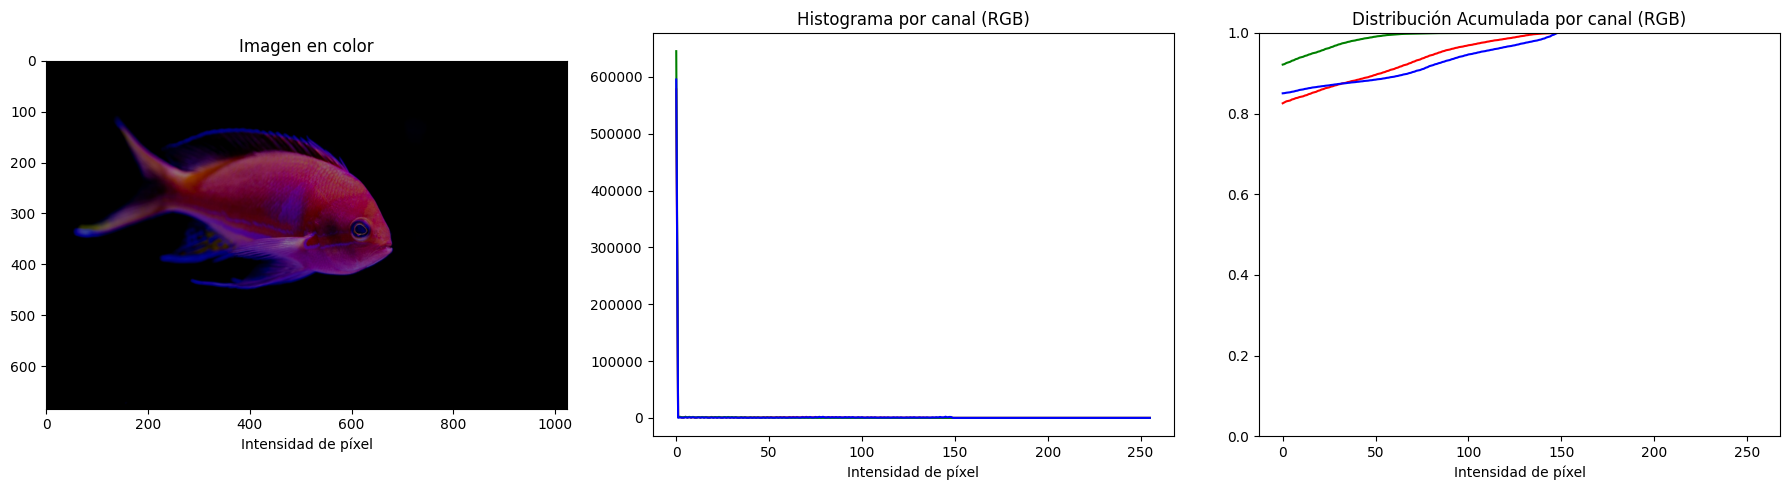

In [16]:
def affine_intensity_adjustment(img, a=1.0, b=0):
    """
    Aplica un ajuste afín de intensidad en una imagen usando la ecuación s = a*r + b.
    
    Parámetros:
    - img: Imagen de entrada (uint8).
    - a: Factor de escala (contraste).
    - b: Desplazamiento (brillo).
    
    Retorna:
    - Imagen transformada (uint8).
    """
    if img.dtype != np.uint8:
        raise ValueError("La imagen debe ser de tipo uint8")

    # Convertir la imagen a float para evitar problemas en la operación
    img_float = img.astype(np.float64)

    # Aplicar la transformación afín
    adjusted_img = a * img_float + b

    # Asegurar que los valores se mantengan en el rango válido [0, 255]
    adjusted_img = np.clip(adjusted_img, 0, 255)

    # Convertir de vuelta a uint8
    return adjusted_img.astype(np.uint8)

# Cargar una imagen en escala de grises o color
img = cv2.imread('pez.jpg', cv2.IMREAD_COLOR)  # O IMREAD_COLOR para color

# Aplicar ajustes con diferentes valores de a y b
img_adjusted_1 = affine_intensity_adjustment(img, a=1.5, b=0)  # Aumenta el contraste
img_adjusted_2 = affine_intensity_adjustment(img, a=1, b=50)   # Aumenta el brillo
img_adjusted_3 = affine_intensity_adjustment(img, a=0.7, b=-30) # Reduce contraste y brillo

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")

plt.subplot(2, 2, 2)
plt.imshow(img_adjusted_1, cmap='gray')
plt.title("Mayor Contraste (a=1.5, b=0)")

plt.subplot(2, 2, 3)
plt.imshow(img_adjusted_2, cmap='gray')
plt.title("Mayor Brillo (a=1, b=50)")

plt.subplot(2, 2, 4)
plt.imshow(img_adjusted_3, cmap='gray')
plt.title("Menor Contraste y Brillo (a=0.7, b=-30)")

plt.tight_layout()
plt.show()

# También podemos ver los histogramas antes y después del ajuste
plot_histogram(img)
plot_histogram(img_adjusted_1)
plot_histogram(img_adjusted_2)
plot_histogram(img_adjusted_3)


> Realiza la normalización de la imagen usando $r_{norm} =  \frac{r - r_{min}} {r_{max} - r_{min}}$, donde $r_{min}$ es el valor de intensidad mínimo de la imagen, y  $r_{max}$ es el máximo. Este tipo de normalización (min-max normalization) debe retornar una imagen en el rango [0, 1]. En el caso de imagen de color, realiza este proceso para cada canal.

> Convierte la imagen normalizada al rango [0, 255] (se consigue simplemente multiplicando por 255).

> Repite el proceso usando el percentil 2 y 98 como valores de $r_{min}$ y $r_{max}$.

> Usa las técnicas anteriores para visualizar la imagen `http://www.atc.uniovi.es/grado/3va/prac/convection.png`




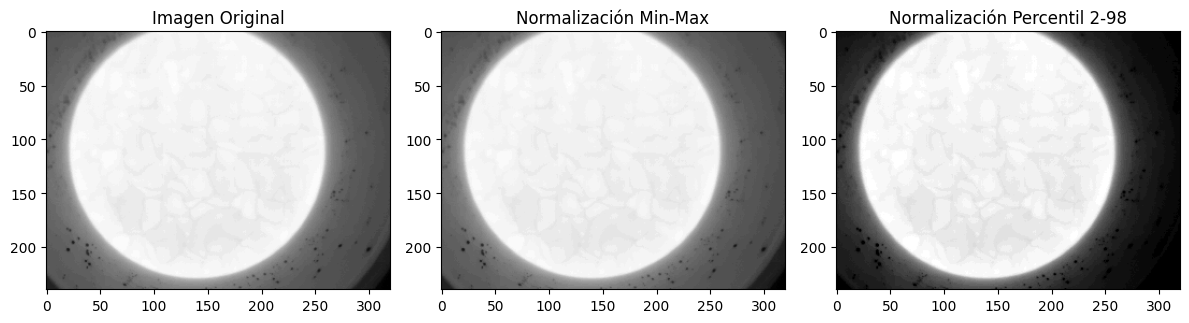

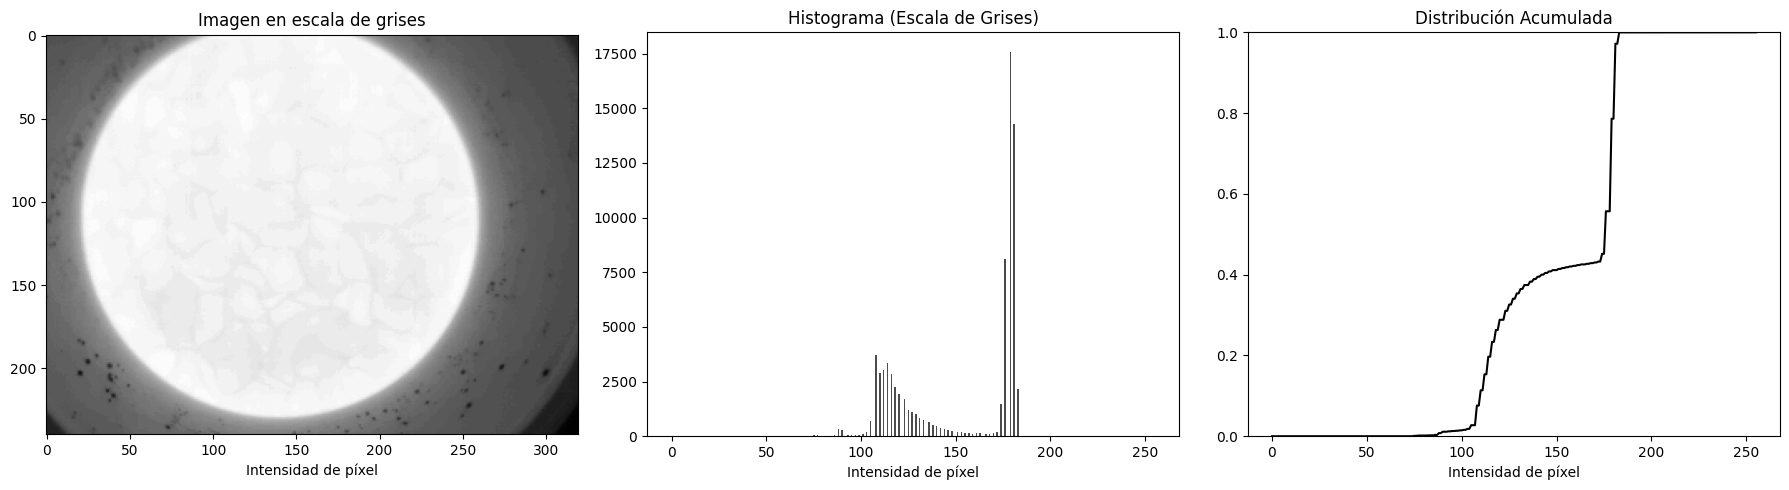

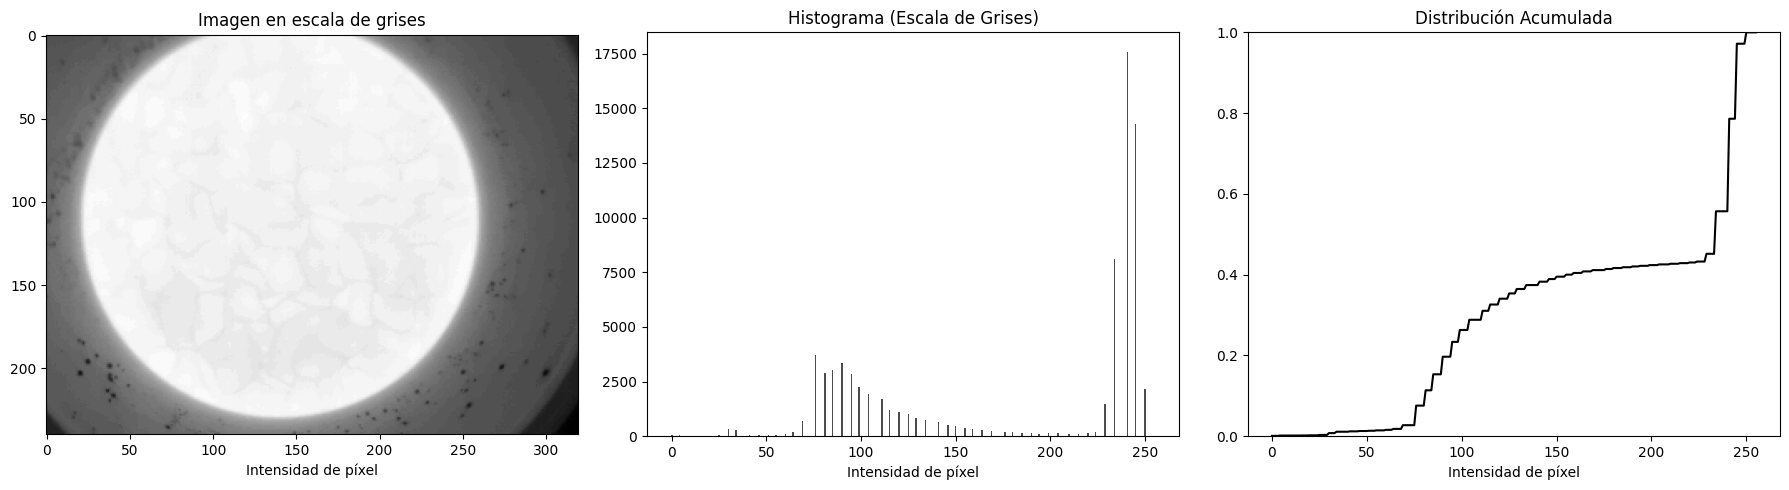

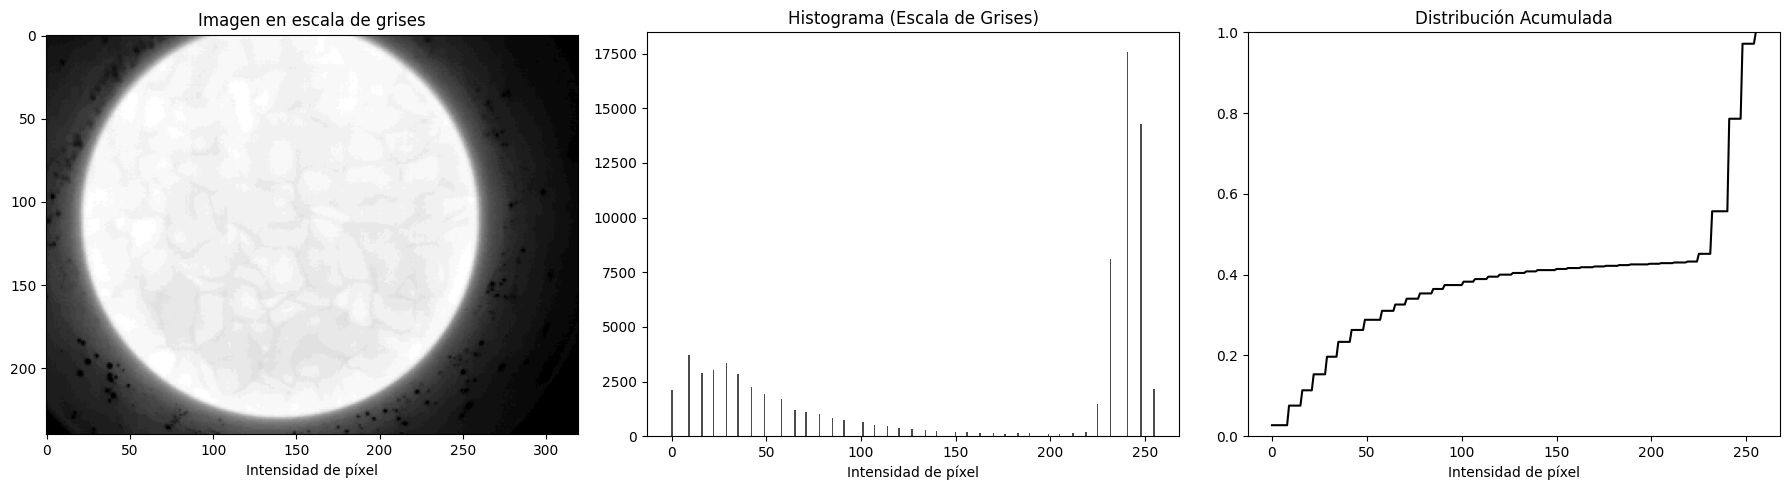

In [18]:
def min_max_normalization(img, min_val=None, max_val=None):
    """
    Normaliza la imagen al rango [0, 1] usando la normalización min-max.
    Luego la convierte al rango [0, 255].
    
    Parámetros:
    - img: Imagen de entrada (uint8).
    - min_val: Valor mínimo a usar para la normalización (opcional).
    - max_val: Valor máximo a usar para la normalización (opcional).
    
    Retorna:
    - Imagen normalizada en uint8.
    """
    if img.dtype != np.uint8:
        raise ValueError("La imagen debe ser de tipo uint8")
    
    img_float = img.astype(np.float64)  # Convertir a float para precisión
    
    # Si min_val y max_val no se definen, usar valores mínimo y máximo de la imagen
    if min_val is None:
        min_val = img_float.min()
    if max_val is None:
        max_val = img_float.max()

    # Aplicar la normalización min-max
    norm_img = (img_float - min_val) / (max_val - min_val)
    norm_img = np.clip(norm_img, 0, 1)  # Asegurar que esté en [0,1]

    # Convertir a escala [0, 255] y de vuelta a uint8
    return (norm_img * 255).astype(np.uint8)

def percentile_normalization(img, p_min=2, p_max=98):
    """
    Normaliza la imagen usando percentiles en lugar de valores extremos.
    Se usa el percentil p_min como r_min y el percentil p_max como r_max.

    Parámetros:
    - img: Imagen de entrada (uint8).
    - p_min: Percentil mínimo (default 2%).
    - p_max: Percentil máximo (default 98%).

    Retorna:
    - Imagen normalizada en uint8.
    """
    min_val = np.percentile(img, p_min)
    max_val = np.percentile(img, p_max)
    return min_max_normalization(img, min_val, max_val)

# Cargar una imagen en escala de grises o color
img = cv2.imread('convection.png', cv2.IMREAD_GRAYSCALE)  # O IMREAD_COLOR para color

# Aplicar normalización min-max
img_norm = min_max_normalization(img)

# Aplicar normalización usando percentiles 2-98
img_percentile = percentile_normalization(img)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 3, 2)
plt.imshow(img_norm, cmap='gray')
plt.title("Normalización Min-Max")

plt.subplot(1, 3, 3)
plt.imshow(img_percentile, cmap='gray')
plt.title("Normalización Percentil 2-98")

plt.tight_layout()
plt.show()

# También visualizar los histogramas
plot_histogram(img)
plot_histogram(img_norm)
plot_histogram(img_percentile)


# Ajuste de contraste no lineal

También es posible realizar ajuste con transformaciones no lineales. Una de las posibilidades es el ajuste de sigmoide, $s = \frac{1}{1 + e^{(\mathrm{cutoff} - r)\mathrm{gain}}}$ donde $s$ es el valor de píxel transformado, $r$ es la intensidad de entrada y $\mathrm{cutoff}$ y $\mathrm{gain}$ son parámetros. Esta ecuación asume que los valores de entrada están normalizados en el intervalo [0, 1].

> Realiza la representación de la función de transformación para $\mathrm{cutoff} = 0.5$ y $\mathrm{gain} = 12$.



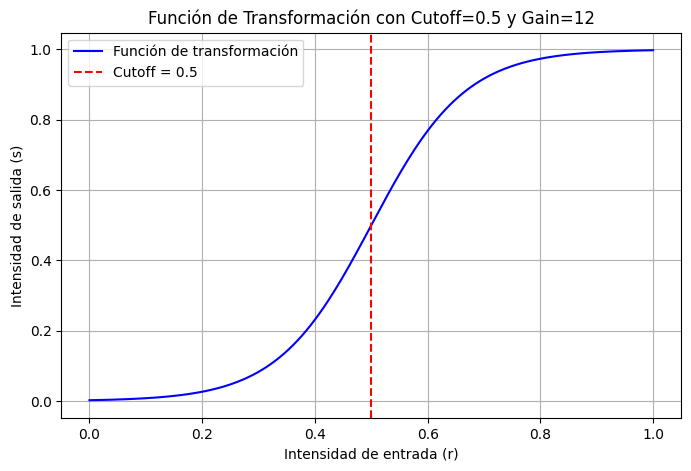

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def transformation_function(r, cutoff=0.5, gain=12):
    """
    Función de transformación sigmoidal.
    
    Parámetros:
    - r: Valores de entrada (intensidades de píxeles normalizadas en [0,1]).
    - cutoff: Punto de corte.
    - gain: Factor de ganancia (controla la pendiente).
    
    Retorna:
    - s: Valores transformados.
    """
    return 1 / (1 + np.exp(-gain * (r - cutoff)))

# Crear valores de entrada r en el rango [0,1]
r_values = np.linspace(0, 1, 256)

# Calcular la transformación
s_values = transformation_function(r_values, cutoff=0.5, gain=12)

# Graficar la función de transformación
plt.figure(figsize=(8, 5))
plt.plot(r_values, s_values, label="Función de transformación", color='blue')
plt.axvline(x=0.5, linestyle='--', color='red', label="Cutoff = 0.5")
plt.xlabel("Intensidad de entrada (r)")
plt.ylabel("Intensidad de salida (s)")
plt.title("Función de Transformación con Cutoff=0.5 y Gain=12")
plt.legend()
plt.grid(True)
plt.show()


Ahora realiza esta mejora de contraste en la imagen `http://www.atc.uniovi.es/grado/3va/prac/persona.png`.
